In [171]:
import cv2 as cv
import numpy as np

In [172]:
import matplotlib.pyplot as plt

In [173]:
import keras

In [174]:
import tensorflow as tf

In [175]:
#내이미지 테스트하기
# image = cv.imread("my_images/img01.jpg")#01~05이미지 깨짐?(heic->jpg변환)
# cv.imshow("MY", image)
# cv.waitKey(0)
# cv.destroyAllWindows()

In [176]:
#이미지를 리스트로 만들기
my_images = [] #빈리스트(이미지 넣어줄 예정)
labels = [0]*5 + [1]*5
# labels = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
my_images.clear() #초기화
for i in range(10):#5,6,7,8,9
    file = "./my_images/img{0:02d}.jpg".format(i + 1)
    # file = f"./my_images/img{i+1:02d}.jpg"
    image = cv.imread(file)
    image = cv.resize(image, (96, 96)) # 64 X 64 RGB
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB) #BGR -> RGB change
    my_images.append(image)
    # labels.append(1)    # 내얼굴=1

print(my_images[1])

[[[ 33  30  25]
  [ 30  28  23]
  [ 19  20  15]
  ...
  [ 42  42  42]
  [ 31  30  28]
  [ 32  30  31]]

 [[ 42  40  33]
  [ 17  17  11]
  [ 19  20  14]
  ...
  [ 40  40  39]
  [ 31  31  29]
  [ 34  34  34]]

 [[ 47  48  40]
  [ 18  19  10]
  [ 15  16   8]
  ...
  [ 32  32  30]
  [ 41  41  39]
  [ 38  40  39]]

 ...

 [[222  81  40]
  [233  79  48]
  [230  74  46]
  ...
  [158  24  37]
  [163  27  40]
  [148  12  19]]

 [[231  89  56]
  [231  79  55]
  [225  72  50]
  ...
  [163  29  40]
  [158  22  34]
  [143   6  16]]

 [[206  63  37]
  [207  54  35]
  [208  56  35]
  ...
  [163  37  48]
  [148  21  33]
  [159  32  41]]]


In [177]:
#이미지를 보는 함수
def show_image(row, col, images):
    (_, ax) = plt.subplots(row, col, figsize = (row, col))#첫번째 객체는 사용하지 않고 두번째 객체(ax)로만 언패킹하기
    for i in range(row):
        for j in range(col):
            if row <= 1:
                axis = ax[j]
            else:
                axis = ax[i, j]
                axis.get_xaxis().set_visible(False)#눈금(?) 없애주기
                axis.get_yaxis().set_visible(False)#눈금(?) 없애주기
                axis.imshow(images[i * col + j])
    plt.show()

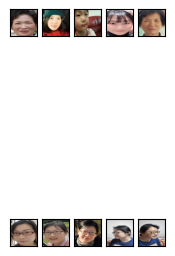

In [178]:
show_image(2, 5, my_images)
#0, 1, 2, 3, 4,
#5, 9(전신사진)
#6, 7, 8=>두명

In [179]:
#학습시키기
#1. 레이블 만들기(정답표)
y = np.array(labels) # 넘파이 배열로 변환

print(y)

[0 0 0 0 0 1 1 1 1 1]


In [180]:
#입력데이터(train data)
X = my_images
print(X)
print(len(X))

X_train = np.array(X)   # 넘파이 배열로 변환
X_train = X_train /255.0 #정규화

print(X_train.shape)

[array([[[ 60,  43,  35],
        [ 59,  42,  34],
        [ 61,  44,  36],
        ...,
        [141, 128, 120],
        [139, 127, 118],
        [139, 126, 118]],

       [[ 53,  36,  28],
        [ 58,  41,  33],
        [ 60,  43,  35],
        ...,
        [141, 126, 120],
        [135, 125, 116],
        [139, 126, 118]],

       [[ 58,  39,  32],
        [ 53,  36,  29],
        [ 56,  39,  31],
        ...,
        [142, 129, 121],
        [143, 128, 121],
        [140, 127, 121]],

       ...,

       [[196, 192, 189],
        [194, 193, 189],
        [193, 192, 187],
        ...,
        [205, 209, 212],
        [202, 207, 210],
        [204, 207, 212]],

       [[196, 195, 191],
        [194, 193, 189],
        [196, 192, 189],
        ...,
        [207, 212, 216],
        [208, 213, 217],
        [208, 211, 216]],

       [[229, 215, 202],
        [233, 217, 204],
        [241, 225, 209],
        ...,
        [215, 218, 225],
        [212, 215, 220],
        [211, 214, 220]

In [181]:
# 학습할 모델 만들기
# model = keras.Sequential(name = "FACE_DETECTOR")
# model.add(keras.layers.Input(shape=(64, 64, 3)))
# #Convolution : Correlation
# model.add(keras.layers.Conv2D(128, (3, 3), activation = "relu"))
# model.add(keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 2))
# model.add(keras.layers.Conv2D(64, (3, 3), activation = "relu"))
# model.add(keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 2))
# model.add(keras.layers.Conv2D(32, (3, 3), activation = "relu"))
# model.add(keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 2))
# model.add(keras.layers.Conv2D(32, (3, 3), activation = "relu"))
# model.add(keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 2))
# #DNN
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(64, activation = "relu"))
# model.add(keras.layers.Dense(64, activation = "relu"))
# model.add(keras.layers.Dense(32, activation = "relu"))
# model.add(keras.layers.Dense(1, activation = "sigmoid"))
from tensorflow.keras.applications import MobileNetV2
#전이 학습
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96,96,3))
base_model.trainable = False  # 사전 학습된 특징 고정

model = keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),  # 50% 노드 랜덤 제거
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_96             │ (None, 3, 3, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │        40,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,299,009 (8.77 MB)

 Trainable params: 41,025 (160.25 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [182]:
# model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss="binary_crossentropy", metrics=["accuracy"])


# model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["categorical_accuracy"])

In [183]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#데이터 증강
# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode="nearest"
# )
# datagen.fit(X_train)
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.7,1.3],   # 밝기 변화 추가
    fill_mode="nearest"
)
datagen.fit(X_train)

In [184]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)

history = model.fit(
    datagen.flow(X_train, y, batch_size=2),
    epochs=200,
    callbacks=[early_stop]
)
# history = model.fit(datagen.flow(X_train, y, batch_size=4), epochs=200)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.3000 - loss: 0.8087
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3000 - loss: 0.9492
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6000 - loss: 0.7046
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4000 - loss: 0.8259
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6000 - loss: 0.6132
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5000 - loss: 0.8030
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5000 - loss: 0.6489
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6000 - loss: 0.7495
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3000 - loss: 0.9659
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5000 - loss: 0.7897
Epoch 11/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4000 - loss: 0.8542
Epoch 12/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5000 - lo

In [185]:
model.save("MY_DETECTOR.keras")

In [186]:
test_images = []
test_images.clear()
for i in range(10):
    file = "./test_images/img{0:02d}.jpg".format(i + 1)
    image = cv.imread(file)
    image = cv.resize(image, (96, 96))  # 64 X 64 RGB -> BGR순서
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)    #BGR -> RGB로 변경하기
    test_images.append(image)

In [187]:
def show_image(row, col, images):
    (_, ax) = plt.subplots(row, col, figsize = (row, col))
    for i in range(row):
        for j in range(col):
            if row <= 1:
                axis = ax[j]
            else:
                axis = ax[i, j]
                axis.get_xaxis().set_visible(False)
                axis.get_yaxis().set_visible(False)
                axis.imshow(images[i * col + j])
    plt.show()

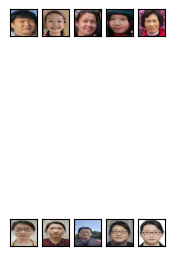

In [188]:
show_image(2, 5, test_images)
# np.array(test_images, dtype='float32') / 255.0
test2_images = np.array(test_images, dtype='float32') / 255.0


In [189]:
# 모델 불러오기
cnn_model = keras.models.load_model("MY_DETECTOR.keras")

In [190]:
#예측
predictions = cnn_model.predict(test2_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [191]:
#결과 출력
# print(predictions.round(3))
for i, p in enumerate(predictions):
    if p > 0.5:
        print(f"img{i+1:02d}.jpg → ✅ 내 얼굴 ({p[0]:.3f})")
    else:
        print(f"img{i+1:02d}.jpg → ❌ 타인 ({p[0]:.3f})")

img01.jpg → ❌ 타인 (0.393)
img02.jpg → ❌ 타인 (0.270)
img03.jpg → ❌ 타인 (0.381)
img04.jpg → ❌ 타인 (0.498)
img05.jpg → ❌ 타인 (0.415)
img06.jpg → ❌ 타인 (0.461)
img07.jpg → ❌ 타인 (0.436)
img08.jpg → ❌ 타인 (0.294)
img09.jpg → ❌ 타인 (0.322)
img10.jpg → ❌ 타인 (0.270)


In [192]:
# 결론 : 내얼굴과 타인의 얼굴을 구분하지 못하고 모두 내얼굴로 판단함